# **Génération, analyse et classification de trajectoires d'objets**

 Dans le cadre de notre projet S9 à l'ENSEIRB, nous(groupe de 5) allons travailler sur la classification de trajectoires.
- **Description du projet**: 


## **1. Génération de trajectoires synthétiques**

### **1.1 Cas des MRU dans le plan:**

- **Obtension des paramètres de la représentation d'état**



### **1.1.1 Modèle Continu**

Dans ce modèle, l'état est défini par les positions et les vitesses dans le plan. Le vecteur d'état est donc :

$$
x(t) = \begin{bmatrix} x(t) \\ \frac{dx(t)}{dt} \\ y(t) \\ \frac{dy(t)}{dt} \end{bmatrix}
$$

L'équation de mouvement pour le système dans le plan est donnée par :

$$
\frac{dx(t)}{dt} = A \cdot x(t) + B \cdot w(t)
$$

où :
- `x(t)` est le vecteur d'état : $\begin{bmatrix} x(t) & \frac{dx(t)}{dt} & y(t) & \frac{dy(t)}{dt} \end{bmatrix}$,
- `A` est la matrice de transition continue, et
- `B` est la matrice d'entrée du bruit.

La matrice de transition continue `A` est :

$$
A = \begin{bmatrix} 
0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 \\ 
0 & 0 & 0 & 0 
\end{bmatrix}
$$

La matrice d'entrée `B` pour le bruit `w(t)` est :

$$
B = \begin{bmatrix} 
0 & 0 \\ 
1 & 0 \\ 
0 & 0 \\ 
0 & 1 
\end{bmatrix}
$$

où le bruit `w(t)` est un vecteur gaussien de dimension 2 avec une variance `q = ngT`.

### **1.1.2. Solution de l'Équation de l'État**

Nous résolvons l'équation différentielle en utilisant la solution générale pour un système linéaire :

$$
x(t) = e^{A(t - t_0)} x(t_0) + \int_{t_0}^{t} e^{A(t - \tau)} B w(\tau) \, d\tau
$$

### **1.1.3. Discrétisation**

Pour passer à un modèle discret, nous prenons `t = (k+1)*T` et `t0 = k*T`, où `T` est la période d'échantillonnage. L'équation devient alors :
$$
x((k+1)T) = e^{A T} x(kT) + \int_{kT}^{(k+1)T} e^{A((k+1)T - \tau)} B w(\tau) \, d\tau
$$

#### **1.1.3.1 Matrice de Transition Discrète `Phi(k)`**

La matrice de transition discrète `Phi(k)` est définie comme :

$$
\Phi(k) = e^{AT}
$$

Pour calculer l'exponentielle de la matrice `A`, nous utilisons son développement en série de Taylor. Nous obtenons l'exponentielle matricielle suivante à l'ordre 1 :

$$
e^{A T} = \begin{bmatrix} 
1 & T & 0 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 1 & T \\ 
0 & 0 & 0 & 1 
\end{bmatrix}
$$


#### **1.1.3.2 Modèle du Bruit**

Pour la contribution du bruit, nous devons calculer l'intégrale suivante :

$$
u(k) = \int_{kT}^{(k+1)T} e^{A((k+1)T - \tau)} B w(\tau) \, d\tau
$$
Nous obtenons, après intégration, la contribution du bruit dans les deux dimensions :

$$
u(k) = \begin{bmatrix} 
\frac{T^2}{2} & 0 \\ 
T & 0 \\ 
0 & \frac{T^2}{2} \\ 
0 & T 
\end{bmatrix} w(kT)
$$

#### **1.1.3.3 Covariance du Bruit**

La covariance du bruit `Q` est donnée par la matrice `E[u(k) * u(k)^T]`. En utilisant l'expression de `u(k)`, nous obtenons la matrice de covariance :

$$
Q = q \begin{bmatrix} 
\frac{T^3}{3} & \frac{T^2}{2} & 0 & 0 \\ 
\frac{T^2}{2} & T & 0 & 0 \\ 
0 & 0 & \frac{T^3}{3} & \frac{T^2}{2} \\ 
0 & 0 & \frac{T^2}{2} & T 
\end{bmatrix}
$$

Cette matrice `Q` décrit la covariance du bruit ajouté à chaque pas de temps.
### **1.1.4. Modèle Discret Final**

Le modèle discret final s'écrit :
$$
x((k+1)T) = \Phi(k) \cdot x(kT) + u(k)
$$

où :
$$\Phi(k) = \begin{bmatrix}
1 & T & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & T \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$ u(k) = \begin{bmatrix}
\frac{T^2}{2} & 0 \\
T & 0 \\
0 & \frac{T^2}{2} \\
0 & T
\end{bmatrix} w(kT)$$
- et la covariance du bruit est :
$$Q = q \begin{bmatrix}
\frac{T^3}{3} & \frac{T^2}{2} & 0 & 0 \\
\frac{T^2}{2} & T & 0 & 0 \\
0 & 0 & \frac{T^3}{3} & \frac{T^2}{2} \\
0 & 0 & \frac{T^2}{2} & T
\end{bmatrix} $$

### **Librairies utilies**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys 


### **Code pour générer une seule trajectoire**

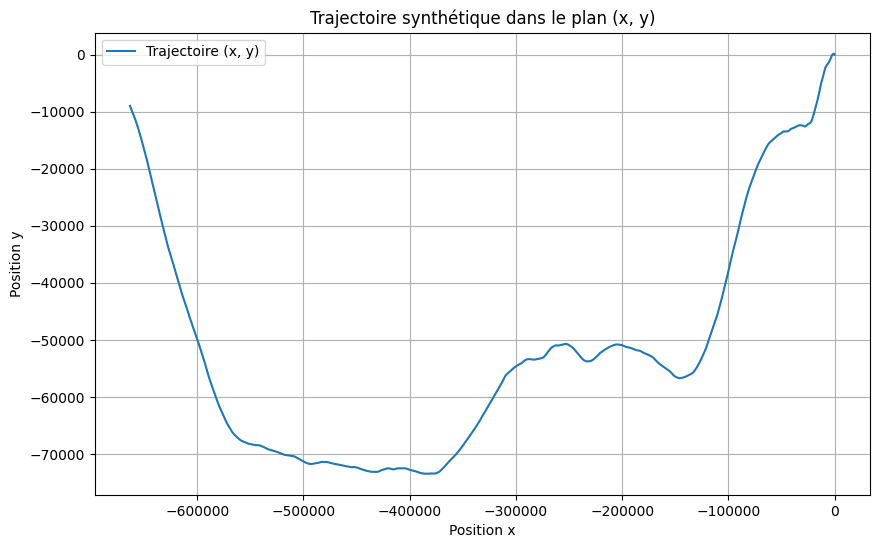

In [3]:
T = 1  
q = 19.5  
N = 1028  

Phi = np.array([[1, T, 0, 0],   
                [0, 1, 0, 0],
                [0, 0, 1, T],
                [0, 0, 0, 1]])
B = np.array([[T**2 / 2, 0],   #
              [T, 0],
              [0, T**2 / 2],
              [0, T]])


Q = q * np.array([[T**3 / 3, T**2 / 2, 0, 0],  
                  [T**2 / 2, T, 0, 0],
                  [0, 0, T**3 / 3, T**2 / 2],
                  [0, 0, T**2 / 2, T]])


x = np.zeros((4, N))  
x[:, 0] = np.array([0, 1, 0, 1])  

# Génération des trajectoires
for k in range(1, N):
    w_k = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=Q) # accélération 
    R = np.linalg.cholesky(Q)
    u_k = R @ w_k
    x[:, k] = Phi @ x[:, k-1] +  u_k  
    


plt.figure(figsize=(10, 6))
plt.plot(x[0, :], x[2, :], label='Trajectoire (x, y)') 
plt.title('Trajectoire synthétique dans le plan (x, y)')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)
plt.show()

## **Génération des mouvements curvilignes dans le plan**

The white-noise jerk model is used
[[0.11488428]
 [0.50501814]
 [0.34705074]]
[[0.11688726]
 [0.12217821]
 [0.18261061]]
[[ 0.23252673]
 [-0.0402709 ]
 [-0.02837946]]
[[-0.82968847]
 [-0.48041868]
 [-0.21978427]]
[[0.86104608]
 [0.33879677]
 [0.11947623]]
[[-1.22046021]
 [-0.90103155]
 [-0.47952805]]
[[-0.00108509]
 [-0.03937075]
 [-0.10271317]]
[[1.05447423]
 [0.77927141]
 [0.50023099]]
[[-0.01621585]
 [ 0.17692582]
 [ 0.07922113]]
[[ 0.39642155]
 [-0.18975602]
 [-0.21488638]]
[[-0.03063519]
 [ 0.32518146]
 [ 0.26176002]]
[[1.22576949]
 [0.57231478]
 [0.21181812]]
[[1.0010243 ]
 [0.64404013]
 [0.32078358]]
[[-2.12444635]
 [-1.17728327]
 [-0.61873739]]
[[-0.65193541]
 [-0.53857405]
 [-0.329718  ]]
[[-0.93902623]
 [-0.51461554]
 [-0.26366599]]
[[0.51235498]
 [0.41465554]
 [0.30553312]]
[[0.9636689 ]
 [0.65474306]
 [0.34365571]]
[[1.89900179]
 [0.84638693]
 [0.30547349]]
[[0.37215771]
 [0.45187378]
 [0.26263993]]
[[-1.56626964]
 [-1.15243589]
 [-0.59281099]]
[[-1.49225278]
 [-0.35241893]

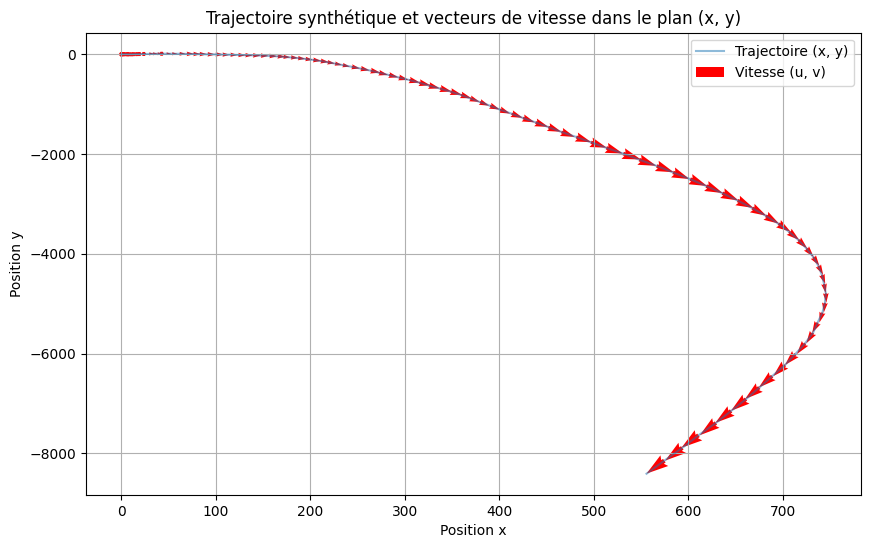

In [4]:
import matplotlib.pyplot as plt 

def MUA_gen(length, T, x_0):
    L = []
    L.append(x_0)  # Ensure x_0 is a column vector
    Q = np.array([
        [T ** 5 / 20, T ** 4 / 8, T ** 3 / 6],
        [T ** 4 / 8, T ** 3 / 3, T ** 2 / 2],
        [T ** 3 / 6, T ** 2 / 2, T]
    ])
    print("The white-noise jerk model is used")

    for i in range(length):
        U = np.random.randn(3, 1)  # Generate a random vector
        R = np.linalg.cholesky(Q)  # Cholesky decomposition
        B = R.T @ U  # Generate the noise vector
        print(B)
        # Update x with the new state
        phi = np.array([[1, T, T ** 2 / 2],
                        [0, 1, T],
                        [0, 0, 1]])
        x_new = phi @ L[-1] + B
        L.append(x_new)

    return L


length = 100
T = 1
x_0 = np.array([[0], [0], [0]])
WNJ_WSA = 1
x = MUA_gen(length, T, x_0)
y = MUA_gen(length, T, x_0)

x_coords = [xi[0, 0] for xi in x]
y_coords = [yi[0, 0] for yi in y]
u_speeds = [xi[1, 0] for xi in x]  # Speed in the x-direction (index 1)
v_speeds = [yi[1, 0] for yi in y]  # Speed in the y-direction (index 3)


plt.figure(figsize=(10, 6))
plt.plot(x_coords, y_coords, label='Trajectoire (x, y)', alpha=0.5)
plt.quiver(x_coords[:-1], y_coords[:-1], u_speeds[:-1], v_speeds[:-1],angles='xy',scale_units='xy', color='r', scale=1, label='Vitesse (u, v)')
plt.title('Trajectoire synthétique et vecteurs de vitesse dans le plan (x, y)')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)
plt.show()

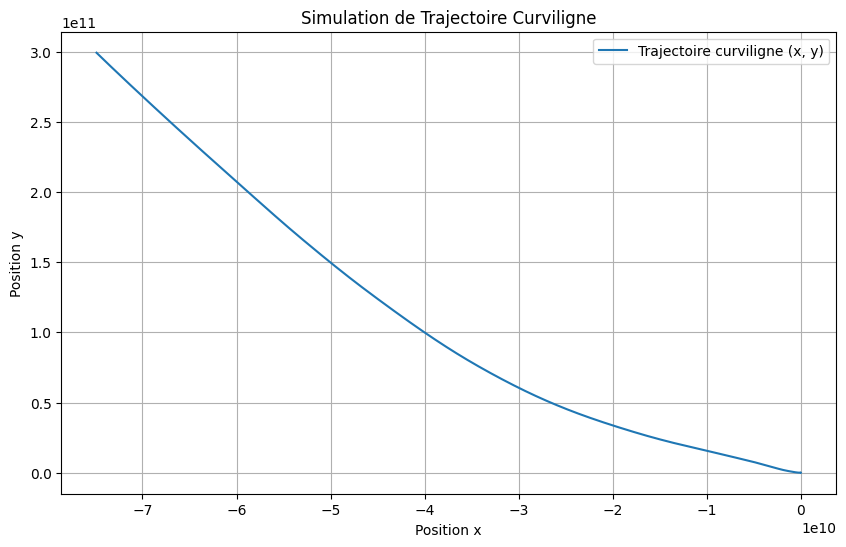

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_curvilinear_motion(T, length, x_0):
    
    states = np.zeros((6, length))
    states[:, 0] = x_0

    
    Q = np.diag([T**3 / 3, T**2 / 2, T**3 / 3, T**2 / 2, 0.1, 0.1])

    for k in range(1, length):
        
        x, v_x, y, v_y, a_t, a_n = states[:, k-1]

        
        theta_k = np.arctan2(v_y, v_x)
        
        # Définir la matrice de transition d'état F
        F = np.array([
            [1, T, 0, 0, 0, 0],
            [0, 1, 0, 0, T * np.cos(theta_k), -T * np.sin(theta_k)],
            [0, 0, 1, T, 0, 0],
            [0, 0, 0, 1, T * np.sin(theta_k), T * np.cos(theta_k)],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ])

        # Bruit de processus
        w_k = np.random.multivariate_normal(mean=[0, 0, 0, 0, 0, 0], cov=Q)

        
        states[:, k] = F @ states[:, k-1] + w_k

    return states

# Paramètres de simulation
T = 1.0
length = 100000

x_0 = np.array([0, 1, 0, 1, 0.5, 0.2])  # positions, vitesses, accélérations initiales

# Générer la trajectoire
states = simulate_curvilinear_motion(T, length, x_0)

# Visualiser la trajectoire
plt.figure(figsize=(10, 6))
plt.plot(states[0, :], states[2, :], label="Trajectoire curviligne (x, y)")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Trajectoire Curviligne")
plt.grid(True)
plt.legend()
plt.show()

##  **Test de la sample entropy** 

In [6]:
n = 1000
X = states[0,:]
Y = states[0,:]
x= X[:n]
y = Y[:n]

In [7]:
sys.path.append(os.path.abspath('..'))
from utils.TraitementStatistiques import SampEn
SampEn(x), SampEn(y)

((array([4.37355636e-01, 7.58781722e+00, 6.15386557e-03]),
  array([3.22548e+05, 1.63000e+02, 1.62000e+02]),
  array([4.99500e+05, 3.21762e+05, 1.63000e+02])),
 (array([4.37355636e-01, 7.58781722e+00, 6.15386557e-03]),
  array([3.22548e+05, 1.63000e+02, 1.62000e+02]),
  array([4.99500e+05, 3.21762e+05, 1.63000e+02])))